# Regression

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

We need the insurance dataset again. Please load it from https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv as a dataframe named _sample_.

In [2]:
sample = 

Make sure the data is loaded correctly by looking at the first lines.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


What are the main statistics from the dataset? (describe)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Linear Model

In [5]:
from sklearn import linear_model

## Fitting a model

The first thing we would like to do is to fit a linear model. As dependent variable, we take charges, as independent variables bmi, age and children.

In [6]:
m_lin = 
X = 
m_lin.fit(...)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

To get an idea of the relative importance of the features, one can multiply the coefficients of the model with the standard deviation of the variables.

bmi         2024.349519
age         3370.652562
children     654.174800
dtype: float64


Let us try again, but this time with age, bmi and smoker. Children were less of importance. Note that smoker is a categorical variable.

In [8]:
X = 
X.head()

,bmi,age,smoker_yes
0,27.900,19,1
1,33.770,18,0
2,33.000,28,0
3,22.705,33,0
4,28.880,32,0


In [9]:
m_lin.fit(...)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

What is the relative importance of smoking?

In [10]:
np.std(X) * m_lin.coef_

bmi           1966.632053
age           3645.269001
smoker_yes    9613.884735
dtype: float64

Predict the charges for person a (age 20, bmi 20, smoker) and person b (age 50, bmi 20, non-smoker)

In [11]:
m_lin.predict(...)

array([ 23790.10655754,   9644.8760468 ])

## Testing a model

To evaluate a model, it's a good idea to split the data into a train and a test set. In this way, we can discover how the algorithm would perform on unseen data.

Take a sample of 80% of the data for training, keep 20% for testing.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test =

In [14]:
print(X_train.shape)
print(X_test.shape)

(1070, 3)
(268, 3)


Fit a linear model for charges on bmi, age and smoker, using the training set.

In [15]:
m_lin = 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Make a convenience function err that prints the root mean square error (rmse) and the mean absolute error (mae). Print rmse and mae for test data.

In [16]:
import sklearn.metrics as met
def err(y, yhat):
    print() # rmse
    print() # mae

In [17]:
err(y_test, m_lin.predict(X_test))

5832.54836267
3952.60425818


# Regression Trees

Next to linear models, we can fit regression trees.

In [18]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz # for visualizing the tree model. --> conda install python-graphviz

Fit a CART regression tree for charges on bmi, age and smoker on the whole dataset. To keep the tree parsimonious, limit the number of leafs to 3.

In [19]:
m_tree = 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2017, splitter='best')

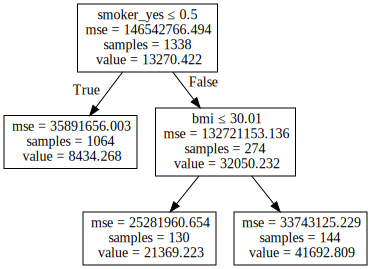

In [20]:
graphviz.Source(export_graphviz(m_tree, out_file = None, feature_names = list(X), special_characters=True))

Note that the values are the average on the dataset under the classification. The top node has the average of the whole dataset.

Predict the charges for person a (age 20, bmi 20, smoker) and person b (age 50, bmi 20, non-smoker)

In [21]:
m_tree.predict(...)

array([ 21369.22328508,   8434.26829786])

Now fit the same model on the train set.

In [22]:
m_tree.fit(...)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2017, splitter='best')

Compute the rmse and mae for the train set.

5952.3015673
4475.93970788


Compute the rmse and mae for the test set.

5639.80009605
4345.53474829


# Support Vector Machines

In [25]:
from sklearn.svm import SVR

Fit support vector regression as before.

In [26]:
m_svm = 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

For person a and b, what are the charges?

array([ 9371.89589484,  9376.41855774])

Train on the train data.

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

What are the errors for both the train and test sets?

12888.5554252
8539.48732528


11676.5642299
7587.48827687


# Neural Network

In [31]:
from sklearn.neural_network import MLPRegressor

Fit a 2-layer - with 5 nodes in first and 2 nodes is second layer - perceptron with _relu_ as the activation function for hidden layers.

In [32]:
m_nn = 

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2017,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Can you display the weights?

[array([[  2.24998829e-315,   1.54539628e+000,   2.02385681e-315,
          -1.90410765e-315,   4.41051799e+000],
        [  2.40418396e-315,   8.51227719e-001,   1.24417909e-315,
           2.09004959e-315,   2.87240197e+000],
        [ -1.46848332e-315,  -2.44172681e+001,   1.96440724e-315,
          -2.96495922e-315,   2.63040882e+001]]),
 array([[  1.37426760e-315,   4.43958591e-315],
        [ -1.83451616e+001,  -1.91010872e+001],
        [  2.89487669e-315,  -4.32799760e-315],
        [ -2.98061142e-315,   3.46477605e-315],
        [  7.97485678e+000,   7.95183215e+000]]),
 array([[ 16.95074283],
        [ 16.87835654]])]

We would like to do the predictions for person a and b again. Can you do this?

array([ 24554.31865128,   8284.50448653])

Train on the train data.

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2017,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

What are the errors for both the train and test sets?

6228.97103019
4479.95500862


5923.24413143
4109.92010942


# Ensembles

## Random Forests

In [38]:
from sklearn.ensemble import RandomForestRegressor

Fit a random forest of 10 trees on bmi, age and smoker for charges as before. Keep the maximum nodes per tree the same as in the regression tree model.

In [39]:
m_rf = 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=3,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2017, verbose=0, warm_start=False)

What is the most important feature for the model?

array([ 0.18493336,  0.        ,  0.81506664])

We would like to do the predictions for person a and b again. Can you do this?

array([ 21385.23603134,   8394.53706919])

Fit the model on the train set.

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=3,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2017, verbose=0, warm_start=False)

What are the errors for both the train and test sets?

5951.62035946
4489.42247492


5657.72585431
4370.09935319


## Gradient Tree Boosting

Next to taking the average of an ensemble of trees, one can also build trees on the errors of trees.

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

Fit a gradient boosted trees, optimize for the squared error (gaussian), on the train set. The dependent variable is again charges, the inputs for the prediction are bmi, age and smoker.

In [46]:
m_gb = 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=3, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, presort='auto', random_state=2017,
             subsample=1.0, verbose=0, warm_start=False)

What are the errors for both the train and test sets?

6862.39982576
5195.34593306


6583.44253307
4934.32775858


# Normalization

In general, predictions are numerically more stable if the input variables are normalized. This doesn't matter that much theoretically, but in practice it can speed up convergence, make the inversion of a matrix numerically possible, etc. Note also that for some algorithms this would indeed have an impact on the results (e.g. k-means clustering).

Can you write a min-max normalization function?

In [49]:
def norm_minmax(x):
    
norm_minmax([1,2,3])

array([ 0. ,  0.5,  1. ])

Now normalize age, bmi and charges from the _sample_ set with min-max normalization function.

In [50]:
sample[['age', 'bmi', 'charges']].head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


In [51]:
sample[['age', 'bmi', 'charges']]..........head()

,age,bmi,charges
0,0.021739,0.321227,0.251611
1,0.000000,0.479150,0.009636
2,0.217391,0.458434,0.053115
3,0.326087,0.181464,0.333010
4,0.304348,0.347592,0.043816
